<span style='background:yellow'> <span style='font-family:Georgia'>  ## Load necessary packages  </span>

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


<span style='background:yellow'> <span style='font-family:Georgia'>  ## Read the data  </span>

In [24]:
df = pd.read_csv('C:/Users/eymoo/Documents/Recommendation/ratings_Electronics (1).csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [25]:
len(df)

7824482

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Data is too big (7.8MM).. let's random sample.. maybe 5% of total?  </span> 

In [26]:
sampled = df.sample(frac=0.05, replace=True, random_state=1)
sampled.columns = ['userId', 'productId','rating','timestamp']
sampled.head(6)

,userId,productId,rating,timestamp
4322341,A2NAUP5YWC456C,B004OFPFVQ,5.0,1325289600
4686059,A105S56ODHGJEK,B0054CFKQI,5.0,1316476800
6762380,A3FU5IXOUUW0GR,B009WU5XUG,4.0,1376006400
3937352,AP5MLYKGVKA5M,B0047XRVWQ,5.0,1398556800
491263,A187PVL5FKH48Z,B0002L5R78,5.0,1327708800
5030793,A265IEMG2K5R4W,B005JXAEGS,4.0,1320710400


<span style='background:yellow'> <span style='font-family:Georgia'>  ## Let's take a look at the distribution  </span> 

In [29]:
#original one
df.nunique()

userId       4201696
productId     476002
rating             5
timestamp       5489
dtype: int64

In [30]:
#sampled one
sampled.nunique()

userId       349403
productId    112052
rating            5
timestamp      5120
dtype: int64

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Quick Visualization of sampled distribution and total distribution </span> 

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

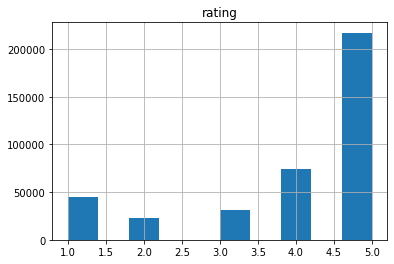

In [20]:
sampled.hist(column='rating')

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

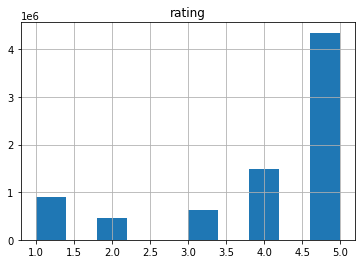

In [28]:
df.hist(column='rating')  

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Distribution in terms of rating per user  </span> 

In [31]:
sampled['countd']=sampled['userId'].value_counts()

In [49]:
countd=sampled['userId'].value_counts()

In [52]:
countd

ADLVFFE4VBT8      24
A5JLAU2ARJ0BO     23
A25C2M3QF9G7OQ    22
A2AY4YUOX2N1BQ    21
A3OXHLG6DIBRW8    20
                  ..
A28WTYI12HZ354     1
ALAZVU7HLNWX8      1
A3HIN3FEL7IEH0     1
A2XH9M404U7ZII     1
AMTKF4RE0P8U5      1
Name: userId, Length: 349403, dtype: int64

<AxesSubplot:>

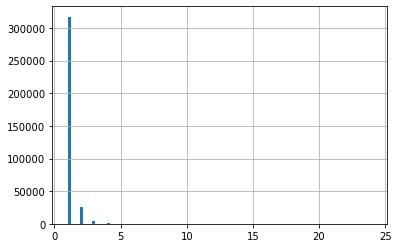

In [54]:
countd.hist(bins=100)

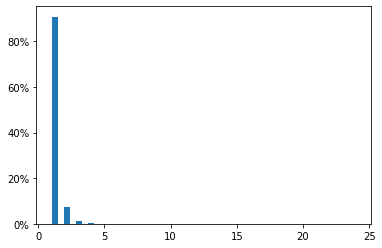

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.hist(countd, weights=np.ones(len(countd)) / len(countd), bins=50)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

<span style='background:yellow'> <span style='font-family:Georgia'>  ## 90% of users in sample data gave 1 rating only, which makes the data too sparse. Let's try another way.
Download the data again, taking another look..

</span> 

In [63]:
df = pd.read_csv('C:/Users/eymoo/Documents/Recommendation/ratings_Electronics (1).csv', names=['userId', 'productId','rating','timestamp'])
df.head()

,userId,productId,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [64]:
countdf=df['userId'].value_counts()

In [65]:
countdf.head(10)

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
Name: userId, dtype: int64

In [66]:
len(df[df['userId'].isin(countdf[countdf >= 100].index)])

44209

<span style='background:yellow'> <span style='font-family:Georgia'>  ## If I take users with 100 reviews then it will be 44209. Let's plan to use this data </span> 

In [70]:
new_df=df[df['userId'].isin(countdf[countdf >= 100].index)]

In [71]:
new_df.head(10)

,userId,productId,rating,timestamp
118,AT09WGFUM934H,0594481813,3.0,1377907200
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
1777,A18S2VGUH9SCV5,1400501776,4.0,1340755200
2162,A5JLAU2ARJ0BO,1400532655,1.0,1291334400
2437,A3HPCRD9RX351S,1400532655,3.0,1332028800
3050,ALUNVOQRXOZIA,1400599997,1.0,1271548800
3383,A3PD8JD9L4WEII,1400699169,5.0,1372204800
3630,ABVYGB2TKBO8F,1685560148,5.0,1351468800
4251,A1U5IJHJK84S54,7562434166,3.0,1384387200


In [148]:
#Calculate the density of the rating matrix - product ratings per user ID

final_ratings_matrix = new_df.pivot(index = 'userId', columns ='productId', values = 'rating').fillna(0)


In [149]:
final_ratings_matrix.head()

productId,0594481813,0970407998,0972683275,1400501776,1400532655,1400599997,1400699169,1685560148,7562434166,787988002X,...,B00L2P3TRS,B00L3YHF6O,B00L403O94,B00L43HAY6,B00L8I6SFY,B00LA6T0LS,B00LBZ1Z7K,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10PEXB6XAQ5XF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10Y058K7B96C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10ZFE6YE0UHW8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
#Calculate the density of the rating matrix

print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)

density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (289, 22635)
given_num_of_ratings =  44209
possible_num_of_ratings =  6541515
density: 0.68%


In [74]:
# product ratings per product ID

final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A10PEXB6XAQ5XF,A10Y058K7B96C6,A10ZFE6YE0UHW8,A11D1KHM7DVOQK,A11I1I9QLMAM1A,A11KZ906QD08C5,A12DQZKRKTNF5E,A1435P5AMCPB3X,...,AVPNQUVZWMDSX,AWNJAY0M5UI70,AWPODHOB4GFWL,AX05DBU8IRUWY,AX7317G153T8W,AY6A8KPYCE6B0,AYB4ELCS5AM8P,AZ515FFZ7I2P7,AZAC8O310IK4E,AZMY6E8B52L2T
productId,,,,,,,,,,,,,,,,,,,,,
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style='background:yellow'> <span style='font-family:Georgia'>  ## Impoorts necessary packages (Surprise packages)  </span> 

In [113]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import SVD, SVDpp, NMF
from surprise import SlopeOne, CoClustering, NormalPredictor, KNNBaseline, BaselineOnly, CoClustering


In [154]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df[['userId','productId','rating']], reader)

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Split Test and Train  </span> 

In [153]:
#Split test and train
trainset, testset = train_test_split(data, test_size=0.25)

<span style='background:yellow'> <span style='font-family:Georgia'>  ## Evaluate the benchmark </span> 

In [114]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation (Feed algorithm above, data above. We will use RMSE for measurement)
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.948571,0.094591,0.076966
SVD,0.954269,2.103881,0.141913
SVDpp,0.954728,56.352387,1.197987
KNNBaseline,1.001305,0.097941,0.207534
KNNWithMeans,1.033088,0.026797,0.209868
KNNWithZScore,1.036527,0.054796,0.186885
CoClustering,1.050799,2.372979,0.125257
SlopeOne,1.058285,7.712250,0.687934
KNNBasic,1.068541,0.013662,0.208539


<span style='background:yellow'> <span style='font-family:Georgia'> ## BaselineOnly algorithm gave us the best rmse, therefore, we will train and predict with BaselineOnly and use Alternating Least Squares (ALS).<br><br> (For the bsl_options : there are SFD and ALS (SGD: Stochastic Gradient Descent, ALS:Alternating Least Squares).
<br>
<br>#'reg_i': The regularization parameter for items. 
<br>#'reg_u': The regularization parameter for users. 
<br>#'n_epochs': The number of iteration of the ALS procedure. Default is 10.what is described is a single iteration ALS process.</span>

In [117]:
print('Using ALS')

bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94674275, 0.93776869, 0.95159128]),
 'fit_time': (0.05896711349487305, 0.06540226936340332, 0.0599668025970459),
 'test_time': (0.09394574165344238, 0.1449136734008789, 0.06895756721496582)}

In [156]:
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9484


0.9484248592878833

In [119]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [120]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
8538,ACJT8MUC0LRF0,B004KMC0SO,5.0,5.0,{'was_impossible': False},99,3,0.0
2110,A1CMD08Z49PGKQ,B0082E9K7U,5.0,5.0,{'was_impossible': False},174,19,0.0
2151,AZMY6E8B52L2T,B001TH7GUU,5.0,5.0,{'was_impossible': False},137,17,0.0
8518,A2HRHF83I3NDGT,B001TH7GVE,5.0,5.0,{'was_impossible': False},95,13,0.0
8502,A1E1LEVQ9VQNK,B000HZGQ9C,5.0,5.0,{'was_impossible': False},159,2,0.0
4555,ACJT8MUC0LRF0,B00ISFNSBW,5.0,5.0,{'was_impossible': False},99,8,0.0
4092,A14JBDSWKPKTZA,B000N99BBC,5.0,5.0,{'was_impossible': False},69,35,0.0
7645,A25HBO5V8S8SEA,B00006HCHH,5.0,5.0,{'was_impossible': False},123,1,0.0
2249,A1E1LEVQ9VQNK,B000BQ7GW8,5.0,5.0,{'was_impossible': False},159,12,0.0
8447,A3S3R88HA0HZG3,B005FDXZJU,5.0,5.0,{'was_impossible': False},111,13,0.0


In [121]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
9710,A1V4VVBQBFXRHC,B0000AE6G9,1.0,4.695027,{'was_impossible': False},99,1,3.695027
2266,A2SKEQT0WTB954,B00005ABC5,1.0,4.695919,{'was_impossible': False},93,2,3.695919
1690,A3EZFFPVS34AMO,B00026WRFI,1.0,4.698534,{'was_impossible': False},94,2,3.698534
7675,A7QMQBGJ2TCQG,B001D7REIK,1.0,4.705931,{'was_impossible': False},93,4,3.705931
10601,AYB4ELCS5AM8P,B00068NUM6,1.0,4.727144,{'was_impossible': False},125,0,3.727144
4842,A2HRHF83I3NDGT,B002HGFKR8,1.0,4.732056,{'was_impossible': False},95,1,3.732056
6046,A2D1LPEUCTNT8X,B0001FV36E,1.0,4.737769,{'was_impossible': False},92,3,3.737769
8563,A2B7BUH8834Y6M,B001G5ZTLS,1.0,4.758279,{'was_impossible': False},137,7,3.758279
10378,AZMY6E8B52L2T,B004R7P28W,1.0,4.950395,{'was_impossible': False},137,5,3.950395
6402,A5KMMY627T3W,B002QEBMAK,1.0,4.999945,{'was_impossible': False},105,17,3.999945


In [122]:
#https://bmanohar16.github.io/blog/recsys-evaluation-in-surprise
# k-NN Based Algorithms
knnbasic_cv = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=5, n_jobs=5, verbose=False)

In [123]:
#Matrix Factorization Based Algorithms
svd_cv = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=5, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=5, n_jobs=5, verbose=False)

In [124]:
#Other Collaborative Filtering Algorithms
slope_cv = cross_validate(SlopeOne(), data, cv=5, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=5, n_jobs=5, verbose=False)

In [125]:
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 1.0702 	 0.7656
KNN Means 	 1.0282 	 0.7448
KNN ZScore 	 1.0312 	 0.7412

SVD 		 0.9522 	 0.7068
SVDpp 		 0.9526 	 0.7051
NMF 		 1.1083 	 0.8511

SlopeOne 	 1.0552 	 0.7777
CoClustering 	 1.0463 	 0.747



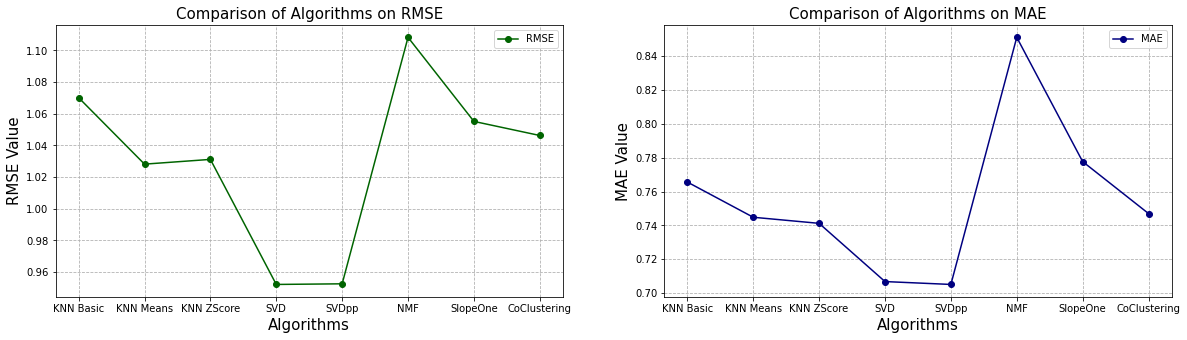

In [126]:
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

<span style='background:yellow'> <span style='font-family:Georgia'>  SVD and SVDpp works better than others  </span> 



Algorithm	 RMSE		 MAE
SVD 		 0.9522 	 0.7068
SVDpp 		 0.9526 	 0.7051

<span style='background:orange'> <span style='font-family:Georgia'>  <br> Appendix. GridSearch CV  
<br>
</span> 

Perform GridSearch CV on top three algorithms - SVDpp, SVD and KNN
Let’s try tweaking parameters on SVDpp, SVD using GridSearchCV

In [127]:
# Parameter space
svd_param_grid = {'n_epochs': [20, 25], 
                  'lr_all': [0.007, 0.009, 0.01],
                  'reg_all': [0.4, 0.6]}

svdpp_gs = GridSearchCV(SVDpp, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svdpp_gs.fit(data)

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svd_gs.fit(data)

In [128]:
print('SVDpp - RMSE:', round(svdpp_gs.best_score['rmse'], 4), '; MAE:', round(svdpp_gs.best_score['mae'], 4))
print('SVD   - RMSE:', round(svd_gs.best_score['rmse'], 4), '; MAE:', round(svd_gs.best_score['mae'], 4))

SVDpp - RMSE: 0.9463 ; MAE: 0.7104
SVD   - RMSE: 0.9468 ; MAE: 0.7104


In [129]:
#SVDpp Best Parameters

print('RMSE =', svdpp_gs.best_params['rmse'])
print('MAE =', svdpp_gs.best_params['mae'])
RMSE = {'n_epochs': 25, 'lr_all': 0.007, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}

RMSE = {'n_epochs': 25, 'lr_all': 0.007, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}


In [130]:
#SVD Best Parameters
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])
RMSE = {'n_epochs': 20, 'lr_all': 0.009, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}

RMSE = {'n_epochs': 20, 'lr_all': 0.009, 'reg_all': 0.4}
MAE = {'n_epochs': 25, 'lr_all': 0.01, 'reg_all': 0.4}


In [131]:
#Tweak parameters on KNN using GridSearchCV
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60]}

knnbasic_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnbasic_gs.fit(data)

knnmeans_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmeans_gs.fit(data)

knnz_gs = GridSearchCV(KNNWithZScore, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnz_gs.fit(data)

In [132]:
x = [15, 20, 25, 30, 40, 50, 60]
y1 = knnbasic_gs.cv_results['mean_test_rmse']
y2 = knnbasic_gs.cv_results['mean_test_mae']

y3 = knnmeans_gs.cv_results['mean_test_rmse']
y4 = knnmeans_gs.cv_results['mean_test_mae']

y5 = knnz_gs.cv_results['mean_test_rmse']
y6 = knnz_gs.cv_results['mean_test_mae']

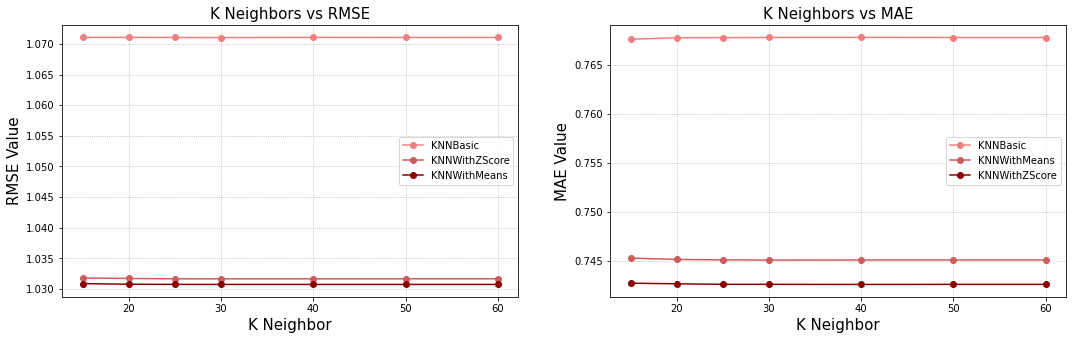

In [133]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y1, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y5, label='KNNWithZScore', color='indianred', marker='o')
plt.plot(x, y3, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y2, label='KNNBasic', color='lightcoral', marker='o')
plt.plot(x, y4, label='KNNWithMeans', color='indianred', marker='o')
plt.plot(x, y6, label='KNNWithZScore', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()

In [ ]:
#Evaluated Models:
#kNN Basic, kNN Means, kNN ZScore, SVD, SVDpp, NMF, SlopeOne, CoClustering

#Final Best Model:
#KNNWIthMeans => Number of Epochs = 20, Learning Rate= 0.009, Regularization Term = 0.4